In [64]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from pathlib import Path
import numpy as np
import seaborn as sn
#from causalnex.structure.notears import from_pandas
#from causalnex.structure import StructureModel
#from IPython.display import Image
#from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [65]:
data = pd.read_csv("../data/treated/twins_data.csv")
data.head()

,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,dmar,mplbir,...,dtotord_min,brstate_reg,stoccfipb_reg,mplbir_reg,lighter,first,id,weight,died,has_missing
0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NaN,1.0,31.0,...,NaN,5.0,5.0,1.0,1,NaN,1.0,2268.0,0.0,True
1,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NaN,1.0,31.0,...,NaN,5.0,5.0,1.0,0,NaN,0.0,2296.0,0.0,True
2,1.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,0.0,1.0,...,3.0,5.0,5.0,5.0,1,0.0,7.0,2610.0,0.0,True
3,1.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,0.0,1.0,...,3.0,5.0,5.0,5.0,0,1.0,6.0,2650.0,0.0,True
4,1.0,1.0,1.0,1.0,5.0,0.0,1.0,5.0,1.0,59.0,...,NaN,5.0,5.0,1.0,1,NaN,11.0,1985.0,0.0,True


In [66]:
alive = data[data["died"] == 0]
alive.head()

,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,dmar,mplbir,...,dtotord_min,brstate_reg,stoccfipb_reg,mplbir_reg,lighter,first,id,weight,died,has_missing
0,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NaN,1.0,31.0,...,NaN,5.0,5.0,1.0,1,NaN,1.0,2268.0,0.0,True
1,1.0,1.0,1.0,1.0,3.0,0.0,1.0,NaN,1.0,31.0,...,NaN,5.0,5.0,1.0,0,NaN,0.0,2296.0,0.0,True
2,1.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,0.0,1.0,...,3.0,5.0,5.0,5.0,1,0.0,7.0,2610.0,0.0,True
3,1.0,1.0,1.0,1.0,3.0,0.0,2.0,3.0,0.0,1.0,...,3.0,5.0,5.0,5.0,0,1.0,6.0,2650.0,0.0,True
4,1.0,1.0,1.0,1.0,5.0,0.0,1.0,5.0,1.0,59.0,...,NaN,5.0,5.0,1.0,1,NaN,11.0,1985.0,0.0,True


In [67]:
dead = data[data["died"] == 1]
dead.head()

,pldel,birattnd,brstate,stoccfipb,mager8,ormoth,mrace,meduc6,dmar,mplbir,...,dtotord_min,brstate_reg,stoccfipb_reg,mplbir_reg,lighter,first,id,weight,died,has_missing
29,1.0,1.0,1.0,1.0,3.0,0.0,1.0,2.0,0.0,1.0,...,NaN,5.0,5.0,5.0,0,NaN,46.0,850.0,1.0,True
53,1.0,1.0,1.0,1.0,4.0,0.0,1.0,3.0,1.0,1.0,...,4.0,5.0,5.0,5.0,0,0.0,85.0,1559.0,1.0,False
98,1.0,1.0,1.0,1.0,4.0,0.0,1.0,5.0,1.0,1.0,...,2.0,5.0,5.0,5.0,1,1.0,162.0,1350.0,1.0,True
124,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,...,NaN,5.0,5.0,5.0,1,NaN,213.0,709.0,1.0,True
125,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,...,NaN,5.0,5.0,5.0,0,NaN,212.0,737.0,1.0,True


In [86]:
mortality = data["died"].mean()
print(mortality)

0.03591001471721915


Media de algumas colunas interessantes, comparando entre indivíduos falecidos e vivos

In [69]:
#peso
d_weight_mean = dead["weight"].mean()
print(d_weight_mean)

a_weight_mean = alive["weight"].mean()
print(a_weight_mean)

997.9108118657299
2455.239615893462


Fatores de risco relacionados diretamente à saúde:

In [70]:
#cigarro e tabaco
d_cig_mean = dead["cigar6"].mean()
print(d_cig_mean)
a_cig_mean = alive["cigar6"].mean()
print(a_cig_mean)

d_tab_mean = dead["tobacco"].mean()
print(d_tab_mean)
a_tab_mean = alive["tobacco"].mean()
print(a_tab_mean)

0.40106951871657753
0.34705279446934223
0.19167550371155886
0.16188626630813663


In [71]:
#media do número de drinks/semana
d_alc_mean = dead["drink5"].mean()
print(d_alc_mean)
a_alc_mean = alive["drink5"].mean()
print(a_alc_mean)

0.04541895066562255
0.030776454935874234


In [72]:
#média do risco cardíaco
d_car_mean = dead["cardiac"].mean()
print(d_car_mean)
a_car_min = alive["cardiac"].mean()
print(a_car_min)

0.0036016949152542373
0.0037917985944860605


In [73]:
#mortalidades fixando o fator de risco
card = data[data["cardiac"] == 1]
n_card = data[data["cardiac"] == 0]

dead_card = card["died"].mean()
dead_normal = n_card["died"].mean()

print(dead_card)
print(dead_normal)


0.03346456692913386
0.035175240460127745


In [74]:
#média do risco pulmonar
d_lun_mean = dead["lung"].mean()
print(d_lun_mean)
a_lun_mean = alive["lung"].mean()
print(a_lun_mean)

0.007627118644067797
0.0033052745385744073


In [75]:
#mortalidades fixando o fator de risco
lung = data[data["lung"] == 1]
n_lung = data[data["lung"] == 0]

dead_lung = lung["died"].mean()
dead_normal = n_lung["died"].mean()

print(dead_lung)
print(dead_normal)

0.07758620689655173
0.035021608122859746


In [76]:
#média do risco de eclampsia
d_ecl_mean = dead["eclamp"].mean()
print(d_ecl_mean)
a_ecl_mean = alive["eclamp"].mean()
print(a_ecl_mean)

0.004661016949152543
0.012433392539964476


In [77]:
#mortalidades fixando o fator de risco
eclampsia = data[data["eclamp"] == 1]
n_eclampsia = data[data["eclamp"] == 0]

dead_eclampsia = eclampsia["died"].mean()
dead_normal = n_eclampsia["died"].mean()

print(dead_eclampsia)
print(dead_normal)

#taxa de mortalidade de bebês vindos de gravidez com risco de eclampsia é menor???????

0.013480392156862746
0.03543574348685302


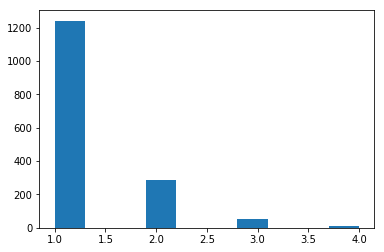

1.2663316582914572
1.2602190961896984


In [89]:
plt.hist(eclampsia["mpre5"])
plt.show()
print(eclampsia['mpre5'].mean())
print(n_eclampsia['mpre5'].mean())

In [88]:
print(eclampsia['nprevistq'].mean())
print(n_eclampsia['nprevistq'].mean())

print(eclampsia['adequacy'].mean())
print(n_eclampsia['adequacy'].mean())

1.9393548387096775
1.9060732268291167
1.317769130998703
1.3151236071602572


In [206]:
#média do risco de anemia
d_ane_mean = dead["anemia"].mean()
print(d_ane_mean)
a_ane_mean = alive["anemia"].mean()
print(a_ane_mean)

0.03629976580796253
0.028931567393105855


In [207]:
#mortalidades fixando o fator de risco
ane = data[data["anemia"] == 1]
n_ane = data[data["anemia"] == 0]

dead_ane = ane["died"].mean()
dead_normal = n_ane["died"].mean()

print(dead_ane)
print(dead_normal)

0.04464714354296687
0.03564725246166729


In [208]:
#média de sangramento uterino
d_utb_mean = dead["uterine"].mean()
print(d_utb_mean)
a_utb_mean = alive["uterine"].mean()
print(a_utb_mean)

0.030249804839968773
0.00810520041289272


In [209]:
#mortalidades fixando o fator de risco
uterine = data[data["uterine"] == 1]
n_uterine = data[data["uterine"] == 0]

dead_uterine = uterine["died"].mean()
dead_normal = n_uterine["died"].mean()

print(dead_uterine)
print(dead_normal)

0.1220472440944882
0.03513647291755056


In [210]:
#hipertensao
d_hyp_mean = dead["chyper"].mean()
print(d_hyp_mean)
a_hyp_mean = alive["chyper"].mean()
print(a_hyp_mean)

0.008001561280249805
0.007160199467891776


In [211]:
#mortalidades fixando o fator de risco
hyper = data[data["chyper"] == 1]
n_hyper = data[data["chyper"] == 0]

dead_hyper = hyper["died"].mean()
dead_normal = n_hyper["died"].mean()

print(dead_hyper)
print(dead_normal)

0.03996101364522417
0.035880675400948726


In [212]:
#diabetes
d_dia_mean = dead["diabetes"].mean()
print(d_dia_mean)
a_dia_mean = alive["diabetes"].mean()
print(a_dia_mean)

0.015027322404371584
0.02341421572190803


In [213]:
#mortalidades fixando o fator de risco
diab = data[data["diabetes"] == 1]
n_diab = data[data["diabetes"] == 0]

dead_diab = diab["died"].mean()
dead_normal = n_diab["died"].mean()

print(dead_diab)
print(dead_normal)

0.023347483323226198
0.036207242883379245


In [214]:
#hemoglobinopatia
d_hem_mean = dead["hemo"].mean()
print(d_hem_mean)
a_hem_mean = alive["hemo"].mean()
print(a_hem_mean)

0.00078064012490242
0.00043615428230812844


In [215]:
#mortalidades fixando o fator de risco
hemo = data[data["hemo"] == 1]
n_hemo = data[data["hemo"] == 0]

dead_hemo = hemo["died"].mean()
dead_normal = n_hemo["died"].mean()

print(dead_hemo)
print(dead_normal)

0.0625
0.0358980830984533


In [216]:
#herpes
d_her_mean = dead["herpes"].mean()
print(d_her_mean)
a_her_mean = alive["herpes"].mean()
print(a_her_mean)

0.00273224043715847
0.0053792361484669175


In [217]:
#mortalidades fixando o fator de risco
herp = data[data["herpes"] == 1]
n_herp = data[data["herpes"] == 0]

dead_herp = herp["died"].mean()
dead_normal = n_herp["died"].mean()

print(dead_herp)
print(dead_normal)

0.01856763925729443
0.036002141810393413


In [218]:
#Hvdramnios/Oliqohvdramnios
d_hyd_mean = dead["hydra"].mean()
print(d_hyd_mean)
a_hyd_mean = alive["hydra"].mean()
print(a_hyd_mean)

0.07747853239656519
0.007872584795661719


In [219]:
#mortalidades fixando o fator de risco
hydr = data[data["hydra"] == 1]
n_hydr = data[data["hydra"] == 0]

dead_hydr = hydr["died"].mean()
dead_normal = n_hydr["died"].mean()

print(dead_hydr)
print(dead_normal)

0.2682432432432432
0.033474966362155655


In [220]:
#incompetent cervix
d_inc_mean = dead["incervix"].mean()
print(d_inc_mean)
a_inc_mean = alive["incervix"].mean()
print(a_inc_mean)

0.02849336455893833
0.004361542823081285


In [221]:
#mortalidades fixando o fator de risco
inc = data[data["incervix"] == 1]
n_inc = data[data["incervix"] == 0]

dead_inc = inc["died"].mean()
dead_normal = n_inc["died"].mean()

print(dead_inc)
print(dead_normal)

0.19571045576407506
0.035070168517161694


In [222]:
#outros riscos
d_oth_mean = dead["othermr"].mean()
print(d_oth_mean)
a_oth_mean = alive["othermr"].mean()
print(a_oth_mean)

0.32201405152224827
0.2713315790238867


In [223]:
#mortalidades fixando o fator de risco
oth = data[data["othermr"] == 1]
n_oth = data[data["othermr"] == 0]

dead_oth = oth["died"].mean()
dead_normal = n_oth["died"].mean()

print(dead_oth)
print(dead_normal)

0.04233374384236453
0.033495960043967064


In [224]:
#hipertensao associada à gravidez
d_phy_mean = dead["phyper"].mean()
print(d_phy_mean)
a_phy_mean = alive["phyper"].mean()
print(a_phy_mean)

0.02654176424668228
0.0612215227599843


In [225]:
#mortalidades fixando o fator de risco
phy = data[data["phyper"] == 1]
n_phy = data[data["phyper"] == 0]

dead_phy = phy["died"].mean()
dead_normal = n_phy["died"].mean()

print(dead_phy)
print(dead_normal)

#??????

0.015891563449404067
0.03718724838219068


In [226]:
#filho anterior >4000 gramas
d_pre4_mean = dead["pre4000"].mean()
print(d_pre4_mean)
a_pre4_mean = alive["pre4000"].mean()
print(a_pre4_mean)

0.0039032006245121
0.008752162598316444


In [227]:
#mortalidades fixando o fator de risco
pre4 = data[data["pre4000"] == 1]
n_pre4 = data[data["pre4000"] == 0]

dead_pre4 = pre4["died"].mean()
dead_normal = n_pre4["died"].mean()

print(dead_pre4)
print(dead_normal)

#??

0.016339869281045753
0.03607934061894731


In [228]:
#prematuro
d_prem_mean = dead["preterm"].mean()
print(d_prem_mean)
a_prem_mean = alive["preterm"].mean()
print(a_prem_mean)

0.03395784543325527
0.0141459372228603


In [229]:
#mortalidades fixando o fator de risco
prem = data[data["preterm"] == 1]
n_prem = data[data["preterm"] == 0]

dead_prem = prem["died"].mean()
dead_normal = n_prem["died"].mean()

print(dead_prem)
print(dead_normal)

0.0820754716981132
0.035213772497687985


In [230]:
#renal
d_ren_mean = dead["renal"].mean()
print(d_ren_mean)
a_ren_mean = alive["renal"].mean()
print(a_ren_mean)

0.002146760343481655
0.0024788101711178635


In [231]:
#mortalidades fixando o fator de risco
ren = data[data["renal"] == 1]
n_ren = data[data["renal"] == 0]

dead_ren = ren["died"].mean()
dead_normal = n_ren["died"].mean()

print(dead_ren)
print(dead_normal)

0.03125
0.0359215388722618


In [232]:
#sensitização de RH
d_rh_mean = dead["rh"].mean()
print(d_rh_mean)
a_rh_mean = alive["rh"].mean()
print(a_rh_mean)

0.00429352068696331
0.005277466815928354


In [233]:
#mortalidades fixando o fator de risco
rh = data[data["rh"] == 1]
n_rh = data[data["rh"] == 0]

dead_rh = rh["died"].mean()
dead_normal = n_rh["died"].mean()

print(dead_rh)
print(dead_normal)

0.029411764705882353
0.035944258922658553


Outras features:

In [234]:
#trimestre de começo do cuidado pre-natal // menor = melhor
d_pre_mean = dead["mpre5"].mean()
print(d_pre_mean)
a_pre_mean = alive["mpre5"].mean()
print(a_pre_mean)

1.4213505074160813
1.249734672811596


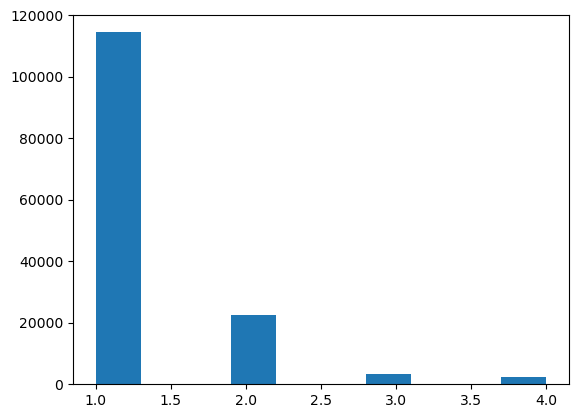

In [235]:
plt.hist(data["mpre5"])
plt.show()

0.03330945558739255
0.037799000357015354
0.024067388688327317
0.15446500402252614


<BarContainer object of 4 artists>

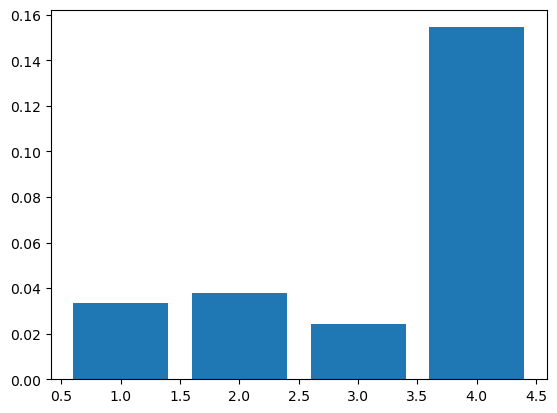

In [236]:
#mortalidades fixando o fator de risco
pre1 = data[data["mpre5"] == 1]
pre2 = data[data["mpre5"] == 2]
pre3 = data[data["mpre5"] == 3]
pre4 = data[data["mpre5"] == 4]

dead_pre1 = pre1["died"].mean()
dead_pre2 = pre2["died"].mean()
dead_pre3 = pre3["died"].mean()
dead_pre4 = pre4["died"].mean()

print(dead_pre1)
print(dead_pre2)
print(dead_pre3)
print(dead_pre4)

plt.bar(range(1,5) , [dead_pre1, dead_pre2, dead_pre3, dead_pre4])

In [237]:
corr_idade = data["mager8"].corr(data["died"])
corr_idade

-0.05529968295527728

In [238]:
#origem da mãe
d_mor_mean = dead["ormoth"].mean()
print(d_mor_mean)
a_mor_mean = alive["ormoth"].mean()
print(a_mor_mean)

0.18501170960187355
0.20429466583312736


In [239]:
#mortalidades fixando a origem da mãe
his = data[data["ormoth"] == 1]
n_his = data[data["ormoth"] == 0]

dead_his = his["died"].mean()
dead_normal = n_his["died"].mean()

print(dead_his)
print(dead_normal)

0.029690675095958456
0.03635285674166069


In [240]:
df_fatores = data[["died", "alcohol", "anemia", "cardiac", "chyper", "diabetes", "eclamp", "hemo", "herpes", "hydra", "incervix", "lung", "othermr", "phyper", "pre4000", "preterm", "renal", "rh", "tobacco", "uterine"]]
df_fatores.head()

,died,alcohol,anemia,cardiac,chyper,diabetes,eclamp,hemo,herpes,hydra,incervix,lung,othermr,phyper,pre4000,preterm,renal,rh,tobacco,uterine
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


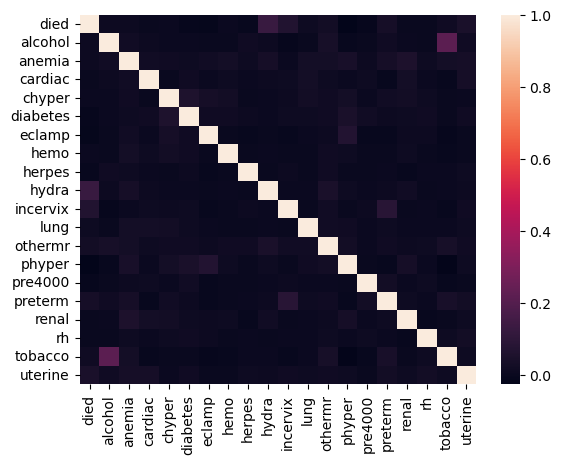

<Figure size 2000x2000 with 0 Axes>

In [241]:
corr_matrix = df_fatores.corr()
sn.heatmap(corr_matrix)
plt.figure(figsize=(20, 20))
plt.show()
#corr_matrix

In [242]:
missing = data[data["has_missing"] == 1]
n_missing = data[data["has_missing"] == 0]

dead_missing = missing["died"].mean()
dead_normal = n_missing["died"].mean()

print(dead_missing)
print(dead_normal)

0.04145315487571702
0.029140722291407222


In [243]:
d_missing_mean = dead["has_missing"].mean()
print(d_missing_mean)
a_missing_mean = alive["has_missing"].mean()
print(a_missing_mean)

0.6346604215456675
0.5466321620167774


In [244]:
drop_col = ['id','birattnd', 'birmon', 'brstate', 'brstate_reg', 
            'crace', 'csex', 'data_year', 'dmar', 'feduc6', 'frace', 'meduc6',
            'mplbir', 'mplbir_reg', 'mrace', 'orfath', 'ormoth', 'pldel',
            'stoccfipb', 'stoccfipb_reg']
data_clean = data.drop(columns = drop_col)
data_clean['has_missing'] = data_clean['has_missing'].apply(lambda x: 1 if x else 0)
data_clean = data_clean.dropna(how='any')

In [245]:
len(data_clean)

142690

In [246]:
import networkx as nx

In [247]:
sm = from_pandas(data_clean, h_tol=0.001, max_iter=200, tabu_parent_nodes=['died'])

In [280]:
sm_copy = sm.copy()

In [285]:
sm_copy.add_edge("weight", "died", weight=1)

In [286]:
sm_copy.remove_edges_below_threshold(0.55)

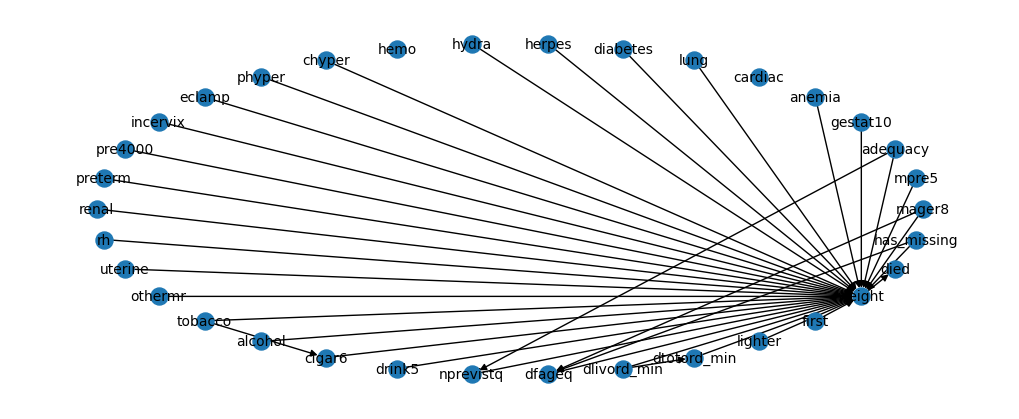

In [287]:
# viz = plot_structure(
#     sm,
#     graph_attributes={"scale": "0.5"},
#     all_node_attributes=NODE_STYLE.WEAK,
#     all_edge_attributes=EDGE_STYLE.WEAK,
#     prog='fdp',
# )
# Image(viz.draw(format='png'))
plt.figure(figsize=(10, 4))
# fig, ax = plt.subplots()
nx.draw_circular(sm_copy, with_labels=True, node_size=150, font_size = 10)
# fig.show()
plt.show()